In [73]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import plot_tree




In [32]:
df = pd.read_csv('50_Startups.csv')
df

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [33]:
df.shape

(50, 5)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RND,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
ADMIN,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
MKT,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
PROFIT,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [36]:
df.duplicated().sum()

0

In [37]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

### Seperate x and Y features

In [38]:
x = df.drop(columns=['PROFIT'])
y = df[['PROFIT']]

In [39]:
x.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [40]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [41]:
x.dtypes

RND      float64
ADMIN    float64
MKT      float64
STATE     object
dtype: object

### Perform Cat and Con seperation on x feature

In [42]:
cat = list(x.columns[x.dtypes == 'object'])
con = list(x.columns[x.dtypes != 'object'])

In [43]:
cat

['STATE']

In [44]:
con

['RND', 'ADMIN', 'MKT']

### Create a preprocessing pipeline for Continuous feature

In [45]:
# num pipeleine
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

# Cat pipeline
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

In [46]:
## Combine both num and cat pip with columnTransformer
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)])

In [47]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['RND', 'ADMIN', 'MKT']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['STATE'])])

### Preprocess the data

In [48]:
x_pre = pre.fit_transform(x)
x_pre[0:5]

array([[ 2.01641149,  0.56075291,  2.15394309,  0.        ,  0.        ,
         1.        ],
       [ 1.95586034,  1.08280658,  1.9236004 ,  1.        ,  0.        ,
         0.        ],
       [ 1.75436374, -0.72825703,  1.62652767,  0.        ,  1.        ,
         0.        ],
       [ 1.55478369, -0.09636463,  1.42221024,  0.        ,  0.        ,
         1.        ],
       [ 1.5049372 , -1.07991935,  1.28152771,  0.        ,  1.        ,
         0.        ]])

In [49]:
cols = pre.get_feature_names_out()
cols

array(['num__RND', 'num__ADMIN', 'num__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'], dtype=object)

In [50]:
x_pre = pd.DataFrame(x_pre, columns=cols)
x_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


### Apply Train Test Split on dataset

In [59]:
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2, random_state=21)

In [60]:
xtrain.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
30,-0.258074,-0.205629,-0.990357,0.0,1.0,0.0
21,0.102724,1.169186,0.732788,0.0,0.0,1.0
19,0.279442,1.159837,-1.743127,0.0,0.0,1.0
11,0.593085,-1.065540,0.319834,1.0,0.0,0.0
22,0.006007,0.051850,0.762376,0.0,1.0,0.0


In [61]:
xtrain.shape

(40, 6)

In [62]:
xtest.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
7,1.245057,0.871980,0.932186,0.0,1.0,0.0
44,-1.134305,1.206419,-1.509074,1.0,0.0,0.0
43,-1.281134,0.217682,-1.449605,0.0,0.0,1.0
25,-0.199312,0.656489,-0.603517,1.0,0.0,0.0
14,1.017181,1.269199,0.375742,0.0,1.0,0.0


In [63]:
xtest.shape

(10, 6)

In [64]:
ytrain.head()

,PROFIT
30,99937.59
21,111313.02
19,122776.86
11,144259.40
22,110352.25


In [68]:
model = DecisionTreeRegressor(max_depth=1, min_samples_split=5, min_samples_leaf=6, criterion='squared_error')
model.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=6, min_samples_split=5)

In [69]:
model.score(xtrain, ytrain)

0.6268054892550098

In [70]:
model.score(xtest, ytest)

0.6434222460818757

### Hyperparameter tunning

In [71]:
params = {'max_depth':[1,2,3,4,5,6,7,8],
          'min_samples_split':[5,6,7,8,9,10],
          'min_samples_leaf':[3,4,5,6,7,8],
          'criterion':['squared_error','absolute_error']}

In [75]:
dtr = DecisionTreeRegressor()
gscv = GridSearchCV(dtr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [76]:
gscv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 6}

In [77]:
gscv.best_score_

-288289828.9613643

In [78]:
best_dtr = gscv.best_estimator_
best_dtr

DecisionTreeRegressor(criterion='absolute_error', max_depth=8,
                      min_samples_leaf=3, min_samples_split=6)

In [79]:
best_dtr.score(xtrain, ytrain)

0.964491148172637

In [80]:
best_dtr.score(xtest, ytest)

0.9397388817493316

### Predicting model result

In [81]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [82]:
ypred_tr[0:5]

array([ 85867.16826087, 148810.00882353, 148810.00882353, 148810.00882353,
        85867.16826087])

In [83]:
ypred_ts[0:5]

array([148810.00882353,  85867.16826087,  85867.16826087,  85867.16826087,
       148810.00882353])

### Check model mse, mae, r,se, r2

In [84]:
def evaluate_model(x, y, model):
    # predict train and test results
    ypred = model.predict(x)
    # Evaluate the model
    mse = mean_squared_error(y, ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print the results
    print(f'Mean Squared Error : {mse:.2f}')
    print(f'Root Mean Squared Error : {rmse:.2f}')
    print(f'Mean Absolute Error : {mae:.2f}')
    print(f'R2 Score : {r2:.4f}')

In [86]:
evaluate_model(xtrain, ytrain, best_dtr)

Mean Squared Error : 54847052.08
Root Mean Squared Error : 7405.88
Mean Absolute Error : 4473.23
R2 Score : 0.9645


In [87]:
evaluate_model(xtest, ytest, best_dtr)

Mean Squared Error : 106948230.95
Root Mean Squared Error : 10341.58
Mean Absolute Error : 6877.47
R2 Score : 0.9397


### ploting the decision tree

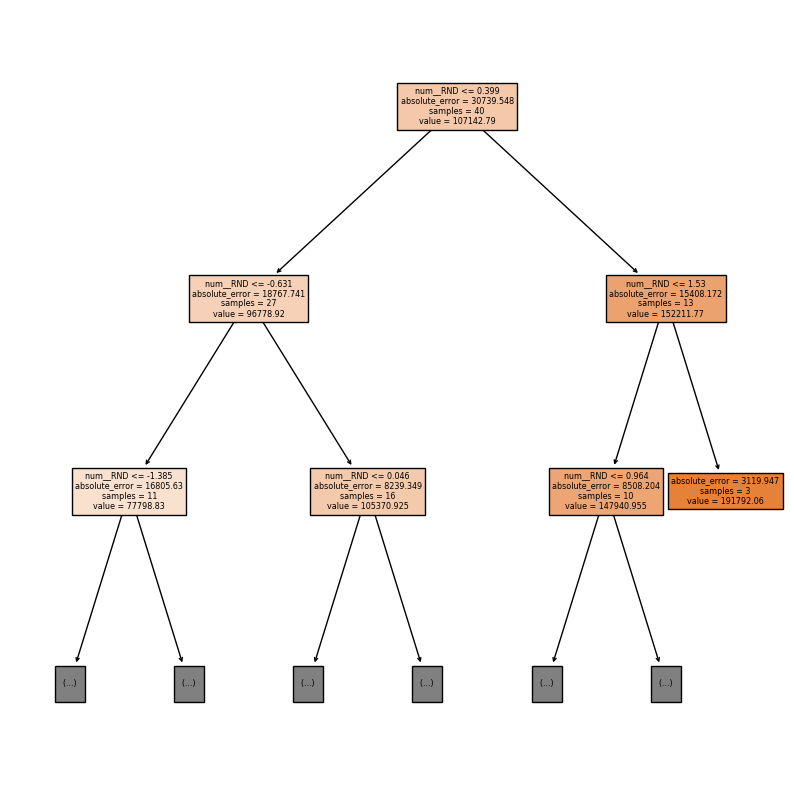

In [88]:
plt.figure(figsize=(10,10))
plot_tree(best_dtr, feature_names=xtrain.columns, filled=True, max_depth=2)
plt.show()

### Plot feature importance

In [89]:
imp = best_dtr.feature_importances_
imp

array([0.97346834, 0.        , 0.0142023 , 0.        , 0.        ,
       0.01232936])

In [90]:
xtrain.columns

Index(['num__RND', 'num__ADMIN', 'num__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'],
      dtype='object')

In [93]:
imp= pd.Series(imp)
imp

0    0.973468
1    0.000000
2    0.014202
3    0.000000
4    0.000000
5    0.012329
dtype: float64

In [95]:
imp.index = xtrain.columns
imp

num__RND                 0.973468
num__ADMIN               0.000000
num__MKT                 0.014202
cat__STATE_California    0.000000
cat__STATE_Florida       0.000000
cat__STATE_New York      0.012329
dtype: float64

In [97]:
imp = imp.sort_values(ascending=False)
imp

num__RND                 0.973468
num__MKT                 0.014202
cat__STATE_New York      0.012329
num__ADMIN               0.000000
cat__STATE_California    0.000000
cat__STATE_Florida       0.000000
dtype: float64

<Axes: title={'center': 'Feature Importance'}>

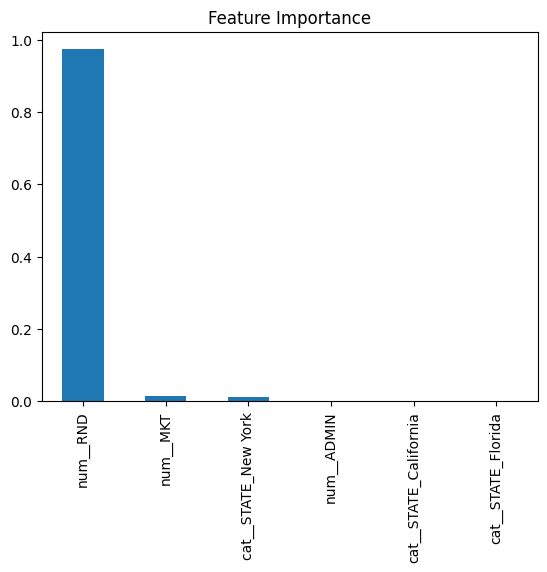

In [98]:
imp.plot(kind='bar', title='Feature Importance')

### RND is most importance feature to predict the PROFIT

### Predicting OUT of Sample Data

In [99]:
xnew = pd.read_csv('test.csv')
xnew

,RND,ADMIN,MKT,STATE
0,78013.11,121597.55,264346.06,California
1,22177.74,154806.14,28334.72,California
2,23640.93,96189.63,148001.11,California
3,101913.08,110594.11,229160.95,Florida
4,77044.01,99281.34,140574.81,New York
5,542.05,51743.15,0.00,New York
6,61136.38,152701.92,88218.23,New York
7,100671.96,91790.61,249744.55,California
8,28663.76,127056.21,201126.82,Florida
9,20229.59,65947.93,185265.10,New York


In [101]:
xnew_pre = pre.transform(xnew)
xnew_pre[0:5]

array([[ 0.0944412 ,  0.00911842,  0.44044622,  1.        ,  0.        ,
         0.        ],
       [-1.13430539,  1.20641936, -1.50907418,  1.        ,  0.        ,
         0.        ],
       [-1.10210556, -0.90693753, -0.52059596,  1.        ,  0.        ,
         0.        ],
       [ 0.62039825, -0.38759909,  0.14980727,  0.        ,  1.        ,
         0.        ],
       [ 0.0731146 , -0.79546917, -0.5819393 ,  0.        ,  0.        ,
         1.        ]])

In [102]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,0.094441,0.009118,0.440446,1.0,0.0,0.0
1,-1.134305,1.206419,-1.509074,1.0,0.0,0.0
2,-1.102106,-0.906938,-0.520596,1.0,0.0,0.0
3,0.620398,-0.387599,0.149807,0.0,1.0,0.0
4,0.073115,-0.795469,-0.581939,0.0,0.0,1.0
5,-1.610433,-2.509409,-1.743127,0.0,0.0,1.0
6,-0.276958,1.130554,-1.014419,0.0,0.0,1.0
7,0.593085,-1.065540,0.319834,1.0,0.0,0.0
8,-0.991570,0.205925,-0.081763,0.0,1.0,0.0
9,-1.177178,-1.997270,-0.212785,0.0,0.0,1.0


### Estimate the profits of the startups

In [103]:
preds = best_dtr.predict(xnew_pre)
preds

array([124266.9 ,  78019.37,  78019.37, 141585.52, 111313.02,  42582.08,
        96778.92, 141585.52,  89949.14,  89949.14,  42582.08, 141585.52,
        96778.92, 156122.51,  78019.37])

### save above results to xnew

In [104]:
xnew['PROFIT_PRED'] = preds
xnew

,RND,ADMIN,MKT,STATE,PROFIT_PRED
0,78013.11,121597.55,264346.06,California,124266.90
1,22177.74,154806.14,28334.72,California,78019.37
2,23640.93,96189.63,148001.11,California,78019.37
3,101913.08,110594.11,229160.95,Florida,141585.52
4,77044.01,99281.34,140574.81,New York,111313.02
5,542.05,51743.15,0.00,New York,42582.08
6,61136.38,152701.92,88218.23,New York,96778.92
7,100671.96,91790.61,249744.55,California,141585.52
8,28663.76,127056.21,201126.82,Florida,89949.14
9,20229.59,65947.93,185265.10,New York,89949.14


### Save above file in result.csv

In [105]:
xnew.to_csv('Result.csv', index=False)